<a href="https://colab.research.google.com/github/ANUPRIYAR/ML_Practise/blob/main/Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter optimisation for XGBoost using RandomizedSearchCV

In [2]:
!wget https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv

--2020-12-17 09:22:12--  https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘Churn_Modelling.csv’

Churn_Modelling.csv 100%[===================>] 668.81K  --.-KB/s    in 0.06s   

2020-12-17 09:22:13 (11.5 MB/s) - ‘Churn_Modelling.csv’ saved [684858/684858]



In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


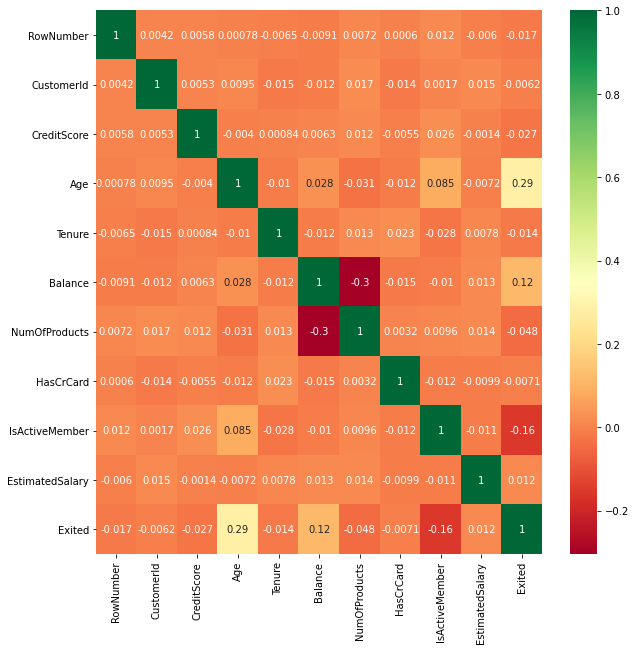

In [48]:
# Correlation
corr_mat = data.corr()
# top_corr_features = corr_mat.index

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# **Get X, Y from the data**

In [17]:
# Get the dependent and Independent features
X = data.iloc[:,3:13]
Y = data['Exited']

**Convert categorical featured into on hot encoding**

In [21]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [24]:
geography.head() 

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [25]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [27]:
# Drop Categorical features
X.drop(['Geography','Gender'], inplace=True, axis=1)

In [29]:
X = pd.concat([X, geography, gender], axis=1)

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# **Hyper Parameter Optimization**

**Set the params**

In [32]:
#  Hyper Paramater Optimization

params = {
    "learning_rate" : [0.05,0.1,0.15, 0.2, 0.25, 0.3],
    "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [34]:
# HyperParameter Optmization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [39]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

**Intialize Classifier**

In [35]:
classifier = xgboost.XGBClassifier()

**Initialize Randomsearch**

In [37]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, verbose=3, cv=5)

In [40]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X,Y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.0s finished



 Time taken: 0 hours 0 minutes and 11.46 seconds.


**Find the best estimator with its best parameters**

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Find the best Paramaters from the given values**

In [43]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.3,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 5}

# **Try Applying the best estimated parameters and check the score**

In [44]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,Y, cv=10)

In [46]:
score

array([0.873, 0.865, 0.88 , 0.866, 0.864, 0.855, 0.869, 0.876, 0.857,
       0.854])

In [47]:
score.mean()

0.8659000000000001